NameError: name 'snap1' is not defined

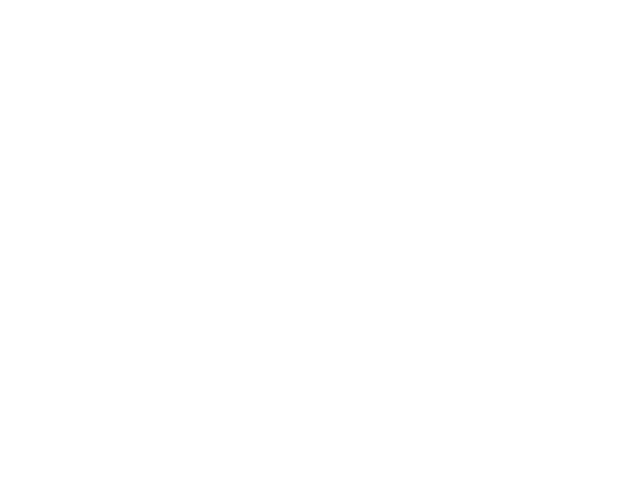

In [2]:
%matplotlib widget
import importlib
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("..")       # to make the upper folder visible
import src
_ = importlib.reload(src)   # this make changes in the src package immediately effective without restarting the kernel

plt.figure(clear=True)
ax=snap1.rawData.plot(x='time',y='Bearing 1 x',legend=False)
ax.grid(which='major',axis='both',color='grey', linestyle='-')
ax.grid(which='minor',axis='both',color='grey', linestyle=':')
ax.minorticks_on()